# netapy: Assessing street network suitability for suistainable mobility

The netapy package is a Python implementation of the [netascore toolbox](https://github.com/plus-mobilitylab/netascore).

In [1]:
import netapy
import osmnx as ox

First, create a street network to assess. We use the `NetascoreNetwork` class to represent such a network. To extent or adapt netascore you can write your own extension to that class, but we stick to the basics here.

There are several ways to initialize the street network, e.g. by giving a placename, a polygon or a bounding box. Under the hood, this all relies on the [osmnx package](https://osmnx.readthedocs.io/en/stable/) to load the relevant OpenStreetMap (OSM) features. Which OSM attributes are loaded as columns is defined in the `defaults` module of netapy, and you can adapt it as you wish.

In [ ]:
network = netapy.network.NetascoreNetwork.from_place("Anif")

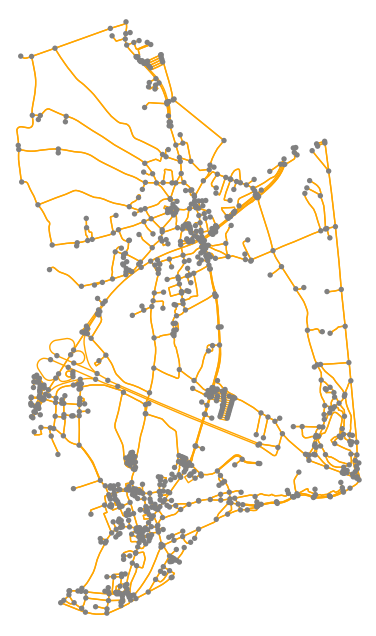

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [27]:
ox.plot_graph(network, bgcolor = "white", edge_color = "orange", node_color = "grey")

You can add additional OSM data to this network object, such as buildings or facilities. However, in a normal workflow you don't have to do this yourself, because when assessing the network all required additional data are fetched automatically whenever needed. The default queries for the additional data layers are defined in the `defaults` module.

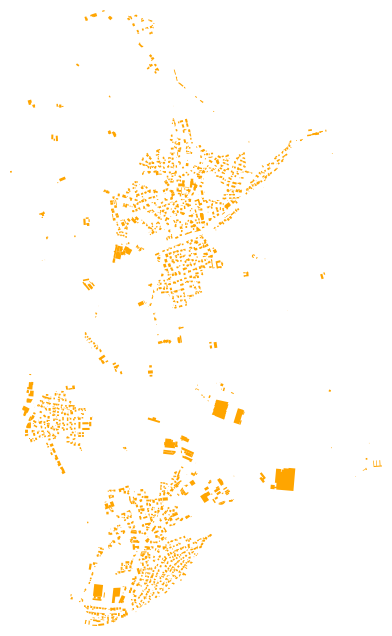

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [43]:
network.fetch_buildings()
ox.plot_footprints(network.buildings, bgcolor = "white", color = "orange")

Now we initialize the assessor, a worker object that is going to take care of assessing the network according to a certain mode profile. Here, we use the default bike profile (defined in module `defaults`) of netascore. However, you can write you own custom mode profile, or read it from a YAML file, using the `NetascoreProfile` class in the `profiles` module.

In [2]:
assessor = netapy.assessors.NetascoreAssessor(profile = "bike")

Now we are ready to assess our network in terms of bikeability.

In [44]:
network.assess(assessor)

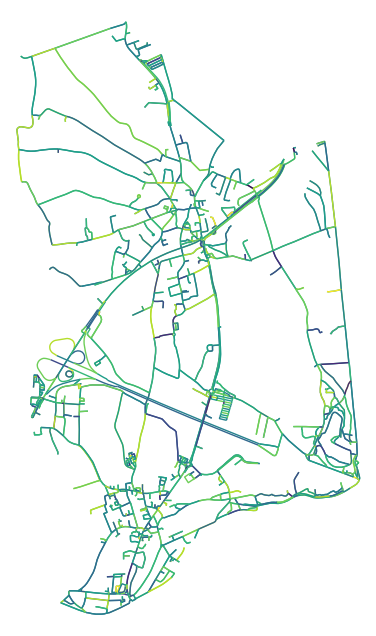

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [54]:
ec = ox.plot.get_edge_colors_by_attr(network, attr = "index_bike:forward", num_bins = 10)
ox.plot_graph(network, bgcolor = "white", node_size = 0, edge_color = ec)

We can see now that each edge has the attributes, subindices and composite indices of netascore added as attributes. You can tune the construction of these names by defining custom prefixes and suffixes in the `naming_config` attribute of the assessor. The default naming config of netascore is defined in the `defaults` module.

In [47]:
list(network.edges(data = True))[0]

(35608985,
 4475973575,
 {'osmid': 244159321,
  'name': 'Berchtesgadener Straße',
  'highway': 'primary',
  'maxspeed': '50',
  'lanes': '4',
  'surface': 'asphalt',
  'oneway': False,
  'reversed': True,
  'length': 12.319,
  'bicycle_infrastructure:forward': 'bicycle_way',
  'bicycle_infrastructure:backward': 'no',
  'index_bike:bicycle_infrastructure:forward': 1,
  'index_bike:bicycle_infrastructure:backward': 0,
  'designated_route:forward': 'local',
  'designated_route:backward': 'national',
  'index_bike:designated_route:forward': 0.8,
  'index_bike:designated_route:backward': 0.9,
  'road_category': 'primary',
  'index_bike:road_category': 0,
  'max_speed:forward': 72,
  'max_speed:backward': 112,
  'index_bike:max_speed:forward': 0.3,
  'index_bike:max_speed:backward': 0,
  'parking:forward': 'no',
  'parking:backward': 'no',
  'index_bike:parking:forward': 1,
  'index_bike:parking:backward': 1,
  'pavement': 'asphalt',
  'index_bike:pavement': 1,
  'gradient:forward': -3,
  'g

Alternatively we can convert the network to two geodataframes (respectively nodes and edges).

In [48]:
nodes, edges = ox.graph_to_gdfs(network)

Instead of adapting the existing network object we can also store the assessed network as a new object.

In [51]:
new = network.assess(assessor, inplace = False)

Finally, it is important to notice that every time you call the `assess` method of the network, by default all subindices (i.e. the normalized indicator values to the interval [0, 1]) are computed no matter if they already are an existing attribute of the network edges, while the attributes (i.e. the utility attributes likes access_car as well as the raw indicator values) are not re-computed when they already exist. You can tune this as shown below. Be aware that setting `overwrite_subs = False` does not check if you are using a different profile than the one that was used to generate the existing subindex values.

In [55]:
new = network.assess(assessor, inplace = False, overwrite_subs = False, overwrite_attrs = True)